In [1]:
import numpy as np
import pandas as pd

In [2]:
D = "$d_{\lambda}$"
DOLD = "$d_{\lambda-1}$"
DATA = "$E_{data}^{\lambda}$"
IN = "$m$"
M2 = "$m_{\lambda-1}^2$"
DDM2 = "$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2$" 
R = "$r$"
R2 = "$r^2$"
SIGMA = "$\sigma$"
SIGMA2 = "$\sigma^{-2}$"
TARGET_TERM = "$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$"

df1 = pd.read_csv("exp2_simba.csv", header=None, sep=";")#.dropna()
df1.columns = [IN, D, DOLD, R, SIGMA, "ENERGY", "COMP", DATA]
df1 = df1.drop(columns=["ENERGY", "COMP"])

df1[R2] = df1[R]*df1[R]
df1[SIGMA2] = 1/(df1[SIGMA]*df1[SIGMA])
df1[M2] = df1[IN]*df1[IN]

df1["key"] = df1[D]*df1[DOLD]*df1[M2]

df1[TARGET_TERM] = df1[D]*df1[DOLD]*df1[M2]*df1[R2]*df1[SIGMA2]


df1

,$m$,$d_{\lambda}$,$d_{\lambda-1}$,$r$,$\sigma$,$E_{data}^{\lambda}$,$r^2$,$\sigma^{-2}$,$m_{\lambda-1}^2$,key,$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$
0,100,172,211,3,2,6.261654e+09,9,0.250000,10000,362920000,8.165700e+08
1,100,224,255,15,3,6.398920e+10,225,0.111111,10000,571200000,1.428000e+10
2,100,502,82,3,2,9.408600e+09,9,0.250000,10000,411640000,9.261900e+08
3,101,269,409,5,1,4.023362e+11,25,1.000000,10201,1122324221,2.805811e+10
4,101,466,171,3,1,5.383246e+10,9,1.000000,10201,812876886,7.315892e+09
...,...,...,...,...,...,...,...,...,...,...,...
995,97,510,510,7,5,3.965283e+10,49,0.040000,9409,2447280900,4.796671e+09
996,98,102,90,11,1,4.720755e+10,121,1.000000,9604,88164720,1.066793e+10
997,98,116,305,7,2,2.779778e+10,49,0.250000,9604,339789520,4.162422e+09
998,99,179,321,7,4,2.290606e+10,49,0.062500,9801,563155659,1.724664e+09


In [3]:
df2 = pd.read_csv("exp1_simba.csv", header=None, sep=";").dropna()
df2.columns = [IN, D, DOLD, "energy", "comp", DATA]
df2 = df2.drop(columns=["energy", "comp"])

df2[R] = 11
df2[SIGMA] = 4

df2[R2] = df2[R]*df2[R]
df2[SIGMA2] = 1/(df2[SIGMA]*df2[SIGMA])
df2[M2] = df2[IN]*df2[IN]

df2["key"] = df2[D]*df2[DOLD]*df2[M2] 
df2[TARGET_TERM] = df2[D]*df2[DOLD]*df2[M2]*df2[R2]*df2[SIGMA2]



df2 = df2.sort_values("key")
selection = df2.iloc[1000:] #df2[df2["key"]>1e10]
selection = selection.drop(columns=["key"])
selection



,$m$,$d_{\lambda}$,$d_{\lambda-1}$,$E_{data}^{\lambda}$,$r$,$\sigma$,$r^2$,$\sigma^{-2}$,$m_{\lambda-1}^2$,$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$
1053,184,40,424,2.098846e+10,11,4,121,0.0625,33856,4.342371e+09
614,120,200,200,2.836007e+10,11,4,121,0.0625,14400,4.356000e+09
660,120,296,136,2.135196e+10,11,4,121,0.0625,14400,4.383878e+09
585,120,136,296,2.157221e+10,11,4,121,0.0625,14400,4.383878e+09
1842,280,104,72,2.142596e+10,11,4,121,0.0625,78400,4.439635e+09
...,...,...,...,...,...,...,...,...,...,...
3325,440,488,424,1.343144e+12,11,4,121,0.0625,193600,3.029399e+11
3310,440,456,456,4.026230e+12,11,4,121,0.0625,193600,3.044391e+11
3326,440,488,456,4.734834e+12,11,4,121,0.0625,193600,3.258032e+11
3311,440,456,488,2.596194e+12,11,4,121,0.0625,193600,3.258032e+11


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

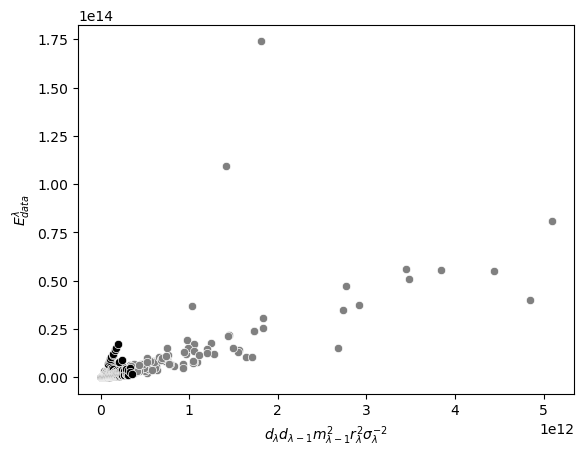

In [5]:
ax = sns.scatterplot(data=df1, x=TARGET_TERM, y=DATA, color="gray")
ax = sns.scatterplot(data=selection, x=TARGET_TERM, y=DATA, color="black", ax=ax)
#ax.set(xlim=(0, 0.4e12))
#ax.set(ylim=(0, 0.25e14))

In [6]:
dfx = pd.concat([df1, selection])
df = dfx[dfx[TARGET_TERM] < 0.4e12]
label="with_added_values"
#df = df1
#label=""

In [7]:
C = 14
values = sorted(list(df[TARGET_TERM].unique()))

In [8]:
values

[6105125.0,
 8921799.36,
 13721600.0,
 20283648.0,
 21167308.8,
 33154500.0,
 41194764.0,
 41472000.0,
 53214021.0,
 60637032.0,
 82412664.84,
 90814500.0,
 104191069.5,
 105504768.0,
 107440135.1111111,
 107505921.60000001,
 110160055.6875,
 118053936.0,
 122253300.0,
 126736942.5,
 133299784.125,
 134082312.0,
 135113472.0,
 138521446.875,
 143995041.66666666,
 188145925.0,
 193255096.32,
 233103669.75,
 239619056.25,
 245394488.88888887,
 247624231.25,
 247888663.20000002,
 248036205.375,
 250789732.20000002,
 262902079.44,
 267196718.25,
 268189218.0,
 272909075.04,
 280298390.625,
 282218618.88,
 303301877.76,
 314402077.08,
 320949900.0,
 329204736.0,
 336698820.0,
 343514578.68,
 379299375.0,
 384784425.0,
 389567120.625,
 402606481.2,
 424282719.0,
 451764743.04,
 458066999.88,
 459219378.24,
 461700000.0,
 488208384.0,
 498824375.625,
 505107697.5,
 543961008.0,
 544602366.0,
 560503523.16,
 593546484.375,
 596594462.75,
 597106575.0,
 608860800.0,
 613949949.0,
 618131899.687

In [9]:
values.append(1e20)

In [10]:
values[-1] 

1e+20

In [11]:
result = []
min_x = range(0,len(values),C)
for min, max in zip(min_x, min_x[1:]):
    print(min, max)
    res = {"box": min}
    sel = df[(df[TARGET_TERM]>= values[min]) & (df[TARGET_TERM] < values[max])][[TARGET_TERM, DATA]]
    min_value = sel[DATA].min()
    min_product = sel[sel[DATA] == min_value][TARGET_TERM]
    res["min_value"] =  min_value
    res[TARGET_TERM] =  min_product.values[0]
    result.append(res)

0 14
14 28
28 42
42 56
56 70
70 84
84 98
98 112
112 126
126 140
140 154
154 168
168 182
182 196
196 210
210 224
224 238
238 252
252 266
266 280
280 294
294 308
308 322
322 336
336 350
350 364
364 378
378 392
392 406
406 420
420 434
434 448
448 462
462 476
476 490
490 504
504 518
518 532
532 546
546 560
560 574
574 588
588 602
602 616
616 630
630 644
644 658
658 672
672 686
686 700
700 714
714 728
728 742
742 756
756 770
770 784
784 798
798 812
812 826
826 840
840 854
854 868
868 882
882 896
896 910
910 924
924 938
938 952
952 966
966 980
980 994
994 1008
1008 1022
1022 1036
1036 1050
1050 1064
1064 1078
1078 1092
1092 1106
1106 1120
1120 1134
1134 1148
1148 1162
1162 1176
1176 1190
1190 1204
1204 1218
1218 1232
1232 1246
1246 1260
1260 1274
1274 1288
1288 1302
1302 1316
1316 1330
1330 1344
1344 1358
1358 1372
1372 1386
1386 1400
1400 1414
1414 1428
1428 1442
1442 1456
1456 1470
1470 1484
1484 1498
1498 1512
1512 1526
1526 1540
1540 1554
1554 1568
1568 1582
1582 1596
1596 1610
1610 1624

In [12]:
result

[{'box': 0,
  'min_value': 125494102.27,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 13721600.0},
 {'box': 14,
  'min_value': 952825021.76,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 110160055.6875},
 {'box': 28,
  'min_value': 1133302802.93,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 245394488.88888887},
 {'box': 42,
  'min_value': 1625585817.33,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 329204736.0},
 {'box': 56,
  'min_value': 3640134569.770001,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 544602366.0},
 {'box': 70,
  'min_value': 3285665151.96,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 661508490.72},
 {'box': 84,
  'min_value': 5134417832.690001,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}

In [13]:
minimas = pd.DataFrame(result)
minimas

,box,min_value,$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$
0,0,1.254941e+08,1.372160e+07
1,14,9.528250e+08,1.101601e+08
2,28,1.133303e+09,2.453945e+08
3,42,1.625586e+09,3.292047e+08
4,56,3.640135e+09,5.446024e+08
...,...,...,...
144,2016,1.016653e+12,2.263171e+11
145,2030,1.447071e+12,2.408195e+11
146,2044,1.167210e+12,2.604782e+11
147,2058,1.343144e+12,3.029399e+11


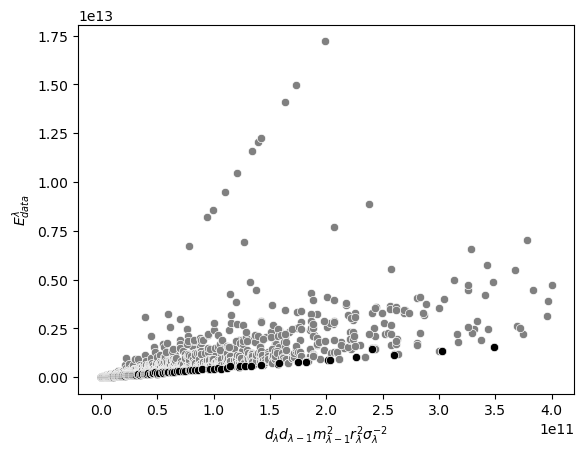

In [14]:
sns.scatterplot(data=df, x=TARGET_TERM, y=DATA, color="gray");
ax = sns.scatterplot(data=minimas, x=TARGET_TERM, y="min_value", color="black");
#ax.set(title=f"C = {C}")
ax.set(ylabel="$E_{data}^{\lambda}$")
plt.savefig(f"second_exp_min_values_{C}{'_'+label if label else label}.png", bbox_inches="tight");

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(minimas[[TARGET_TERM]], minimas["min_value"])

LinearRegression()

In [18]:
model.score(minimas[[TARGET_TERM]], minimas["min_value"])

0.9879658016548262

In [19]:
X = np.linspace(0, 0.5e12, 10000).reshape(-1,1)
X

array([[0.00000000e+00],
       [5.00050005e+07],
       [1.00010001e+08],
       ...,
       [4.99899990e+11],
       [4.99949995e+11],
       [5.00000000e+11]])

In [20]:
y = model.predict(X)

/home/petra/miniconda3/envs/sima/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
regress = pd.DataFrame(zip(X.flatten(), y))
regress

,0,1
0,0.000000e+00,-3.083326e+09
1,5.000500e+07,-2.853628e+09
2,1.000100e+08,-2.623931e+09
3,1.500150e+08,-2.394233e+09
4,2.000200e+08,-2.164535e+09
...,...,...
9995,4.998000e+11,2.292744e+12
9996,4.998500e+11,2.292974e+12
9997,4.999000e+11,2.293204e+12
9998,4.999500e+11,2.293434e+12


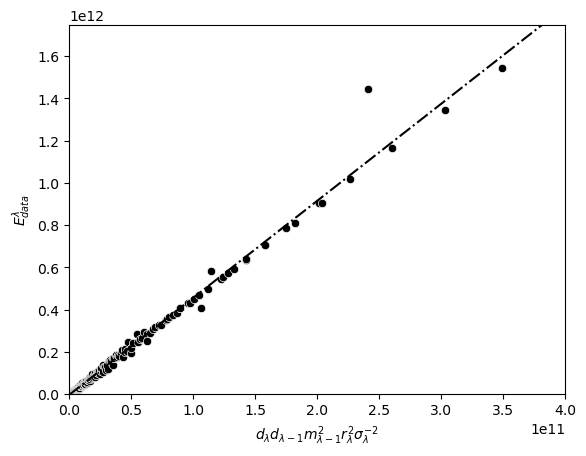

In [22]:
#sns.scatterplot(data=df, x=DDM2, y=DATA, color="gray");
ax = sns.scatterplot(data=minimas, x=TARGET_TERM, y="min_value", color="black");
ax = sns.lineplot(data=regress, x=0, y=1, color="black", ls="-.", ax=ax)
#ax.set(title=f"C = {C}")
ax.set(ylabel="$E_{data}^{\lambda}$")
ax.set(xlim=(0,4e11))
ax.set(ylim=(0, 1.75e12))
plt.savefig(f"second_exp_lin_regress_{C}{'_'+label if label else label}.png", bbox_inches="tight");

In [23]:
import statsmodels.api as sm

#minimas[DDM2] /= 1e10

minimas["SQ"] = minimas[TARGET_TERM]*minimas[TARGET_TERM]

Y=minimas["min_value"]
X=minimas[[TARGET_TERM, "SQ"]]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.pvalues

const                                                                          9.842211e-105
$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$    9.842211e-105
SQ                                                                              4.861149e-01
dtype: float64

In [24]:
import statsmodels.formula.api as smf

In [25]:
minimas["L"] = minimas[TARGET_TERM]
model = smf.ols(formula=f'min_value ~ L + SQ',data=minimas)

In [26]:
results = model.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              min_value   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          6.56e-143
Time:                        18:01:56   Log-Likelihood:                -3813.4
No. Observations:                 149   AIC:                             7631.
Df Residuals:                     147   BIC:                             7637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.74e-11   1.47e-12     59.479      0.000    8.45e-11    9.03e-11
L              4.5217      0.076     59.479      0.000       4.371       4.672
SQ          2.431e-13   3.48e-13      0.698      0.486   -4.45e-13    9.31e-13
==============================================================================
Omnibus:                      274.078   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56896.748
Skew:                           8.716   Prob(JB):                         0.00
Kurtosis:                      97.131   Cond. No.                     2.60e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+22. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
print(results.pvalues)

Intercept    9.842211e-105
L            9.842211e-105
SQ            4.861149e-01
dtype: float64
